#Resolutions for 5/6

In [1]:
import sys
sys.path.append('/Users/demattia/Desktop/Notebooks')
import rootprint
import rootnotes
from array import array
# import LinearFitterHistograms

from ROOT import TFile, TH1F, TCanvas, TLegend, TGraphErrors
import math
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [73]:
region = "1"

layers_list = []
if region == "1":
    layers_list = [5, 6, 7, 8, 9, 10]
elif region == "2":
    layers_list = [5, 6, 7, 8, 9, 11]
elif region == "3":
    layers_list = [5, 6, 7, 8, 11, 12]
elif region == "4":
    layers_list = [5, 6, 7, 11, 12, 13]
elif region == "5":
    layers_list = [5, 6, 11, 12, 13, 14]
elif region == "6":
    layers_list = [5, 6, 11, 12, 14, 15]
elif region == "7":
    layers_list = [5, 11, 12, 13, 14, 15]
elif region == "8":
    layers_list = [5, 11, 12, 13, 14, 15]
elif region == "9":
    layers_list = [5, 11, 12, 13, 14, 15]


f_name = "/linearFitterHistograms.root"

base_dir = "/Users/demattia/RemoteProjects/Test/NewConstants/ConstantsProduction/"
# base_z = base_dir+"Combinations_Longitudinal/Region_"+region+"_"
base_z = base_dir+"Combinations_Longitudinal_Rz/Region_"+region+"_"
# base_z = base_dir+"Combinations_Longitudinal_SecondOrder/Region_"+region+"_"
# base_z = base_dir+"Combinations_Longitudinal_Rz_SecondOrder/Region_"+region+"_"

# Low pT
base_phi_low_pt = base_dir+"Combinations_Transverse_SecondOrder_2_10/Region_"+region+"_"

# High pT
base_phi_high_pt = base_dir+"Combinations_Transverse_SecondOrder_10_more/Region_"+region+"_"

In [51]:
def fit(input_file_name, name):
    # print input_file_name
    input_file = TFile(input_file_name, "READ")
    h = input_file.FindObjectAny(name)
    h.Fit("gaus")
    fitResults = [0]*4
    try:
        fitResults[0] = h.GetFunction("gaus").GetParameter(1)
        fitResults[1] = h.GetFunction("gaus").GetParError(1)
        fitResults[2] = h.GetFunction("gaus").GetParameter(2)
        fitResults[3] = h.GetFunction("gaus").GetParError(2)
    except:
        pass
    h.SetName(input_file_name)
    return h, fitResults, input_file

In [52]:
def fitAndDraw(base_var, f_name, histo, layers_list):
    # print "fname =", f_name
    # print "histo =", histo
    h = []
    h.append(fit(base_var+"All"+f_name, histo))
    for layer in layers_list:
        name = base_var+"Removed_"+str(layer)+f_name
        h.append(fit(name, histo))
    # h.append(fit(base_var+"Removed_5"+f_name, pt_histo))
    # h.append(fit(base_var+"Removed_6"+f_name, pt_histo))
    # h.append(fit(base_var+"Removed_7"+f_name, pt_histo))
    # h.append(fit(base_var+"Removed_8"+f_name, pt_histo))
    # h.append(fit(base_var+"Removed_9"+f_name, pt_histo))
    # h.append(fit(base_var+"Removed_10"+f_name, pt_histo))

    c = TCanvas("c", "c", 800, 800)
    c.Divide(3, 3)
    c.cd(1)
    h[0][0].Draw()
    for i in range(6):
        c.cd(i+4)
        h[i+1][0].Draw()
    
    fitResults = []
    for i in range(len(h)):
        fitResults.append(h[i][1])
    
    return c, h, fitResults

In [53]:
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        # ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
        #         ha='center', va='bottom')


def plot(fitResults, index, y_label, layers_list, y_min = 0, y_max = 0, single_mode = False):
    N = 7
    menMeans = [f[index] for f in fitResults]
    means = menMeans
    bottomMeans = [0]*N
    menStd =   [f[index+1] for f in fitResults]
    if single_mode:
        menMeans = [2*f[index+2] for f in fitResults]
        bottomMeans = [f[index]-f[index+2] for f in fitResults]
        menStd =   [0]*7

    # ind = np.arange(N)  # the x locations for the groups
    ind = np.linspace(0, 2*N, N)  # the x locations for the groups
    width = 1.5       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, menMeans, width, bottom = bottomMeans, color='g', yerr=menStd)
    if single_mode:
        ind = 0.75+ind  # the x locations for the groups
        ax.plot(ind, means, 'ro')

    # add some text for labels, title and axes ticks
    ax.set_ylabel(y_label)
    # ax.set_title('pT relative bias')
    ax.set_xticks(ind+width/2)
    xticklabels = ['All']
    for layer in layers_list:
        xticklabels.append('No layer '+str(layer))
    # ('All', 'No layer 5', 'No layer 6', 'No layer 7', 'No layer 8', 'No layer 9', 'No layer 10')
    ax.set_xticklabels( xticklabels )
    ax.grid()
    if (y_min != y_max):
        ax.set_ylim([y_min, y_max])

    # ax.legend( (rects1[0]), ('Mean', 'Resolution') )
    # ax.legend( (rects1[0]), ('Resolution') )

    autolabel(rects1)

    return plt

#Low pT

##pT Bias and Resolution

In [54]:
pt_histo = "EstimatedParRelError_summary_charge/pt"
c, h, fitResults = fitAndDraw(base_phi_low_pt, f_name, pt_histo, layers_list)
c

AttributeError: 'TObject' object has no attribute 'Fit'

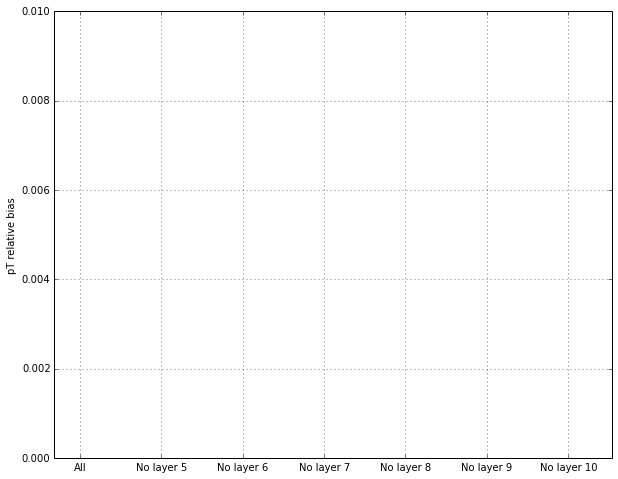

In [55]:
plt = plot(fitResults, 0, 'pT relative bias', layers_list, y_max = 0.01)
plt.show()

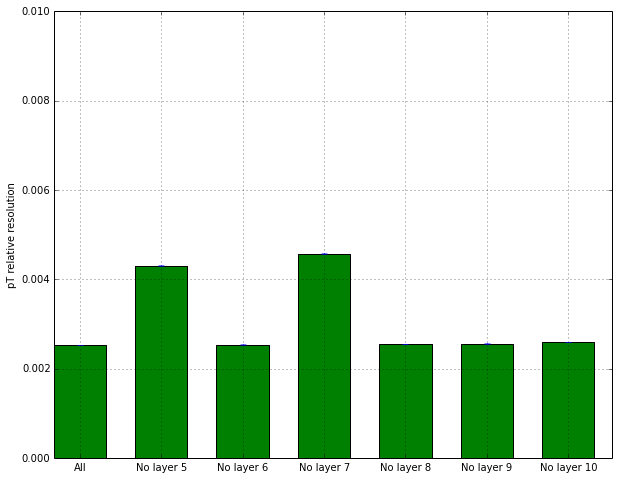

In [56]:
plt = plot(fitResults, 2, 'pT relative resolution', layers_list, y_max = 0.01)
plt.show()

In [57]:
# plt = plot(fitResults, 0, 'pT relative resolution', single_mode = True, y_min = -0.02, y_max = 0.02)
# plt.show()

##Phi0 Bias and resolution

In [58]:
phi0_histo = "EstimatedParError_summary_phi"
c, h, fitResults = fitAndDraw(base_phi_low_pt, f_name, phi0_histo, layers_list)
c

AttributeError: 'TObject' object has no attribute 'Fit'

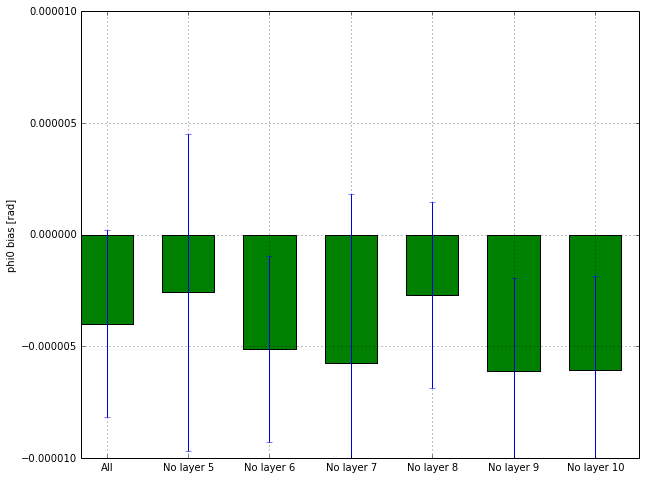

In [59]:
plt = plot(fitResults, 0, 'phi0 bias [rad]', layers_list, y_min = -0.00001, y_max = 0.00001)
plt.show()

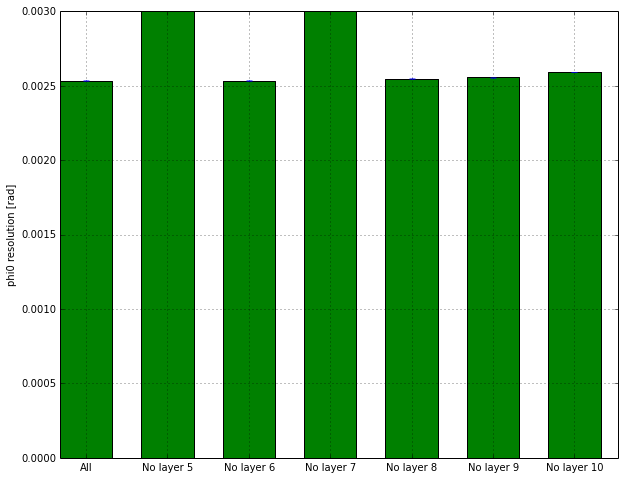

In [60]:
plt = plot(fitResults, 2, 'phi0 resolution [rad]', layers_list, y_max = 0.003)
plt.show()

#High pT

In [61]:
pt_histo = "EstimatedParRelError_summary_charge/pt"
c, h, fitResults = fitAndDraw(base_phi_high_pt, f_name, pt_histo, layers_list)
c

AttributeError: 'TObject' object has no attribute 'Fit'

In [ ]:
plt = plot(fitResults, 0, 'pT relative bias', layers_list, y_max = 0.01)
plt.show()

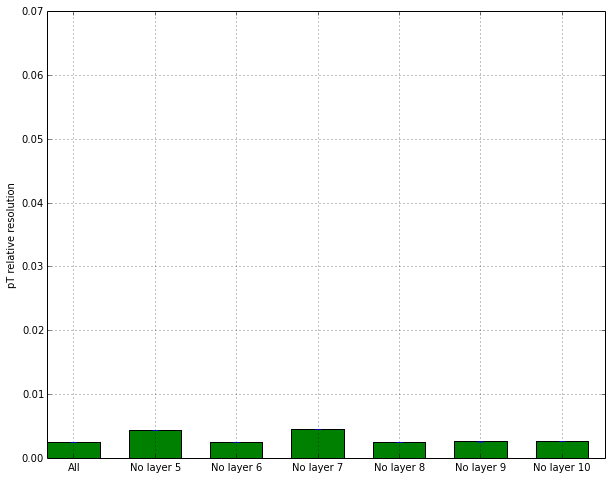

In [62]:
plt = plot(fitResults, 2, 'pT relative resolution', layers_list, y_max = 0.07)
plt.show()

In [63]:
phi0_histo = "EstimatedParError_summary_phi"
c, h, fitResults = fitAndDraw(base_phi_high_pt, f_name, phi0_histo, layers_list)
c

AttributeError: 'TObject' object has no attribute 'Fit'

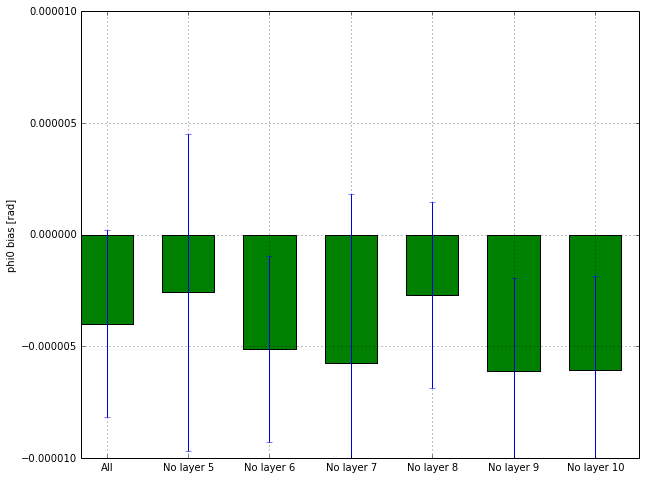

In [64]:
plt = plot(fitResults, 0, 'phi0 bias [rad]', layers_list, y_min = -0.00001, y_max = 0.00001)
plt.show()

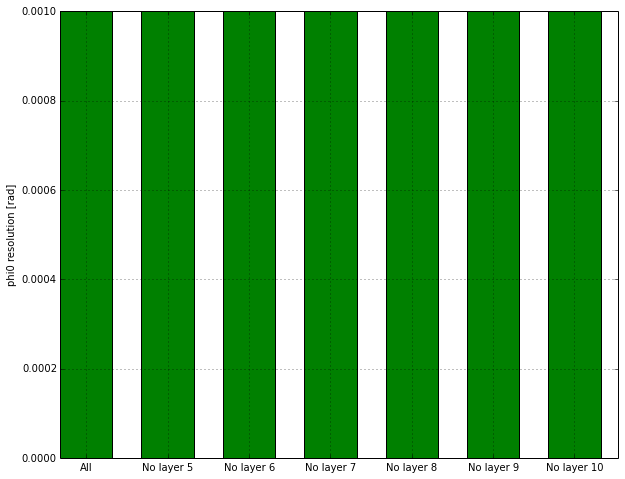

In [65]:
plt = plot(fitResults, 2, 'phi0 resolution [rad]', layers_list, y_max = 0.001)
plt.show()

## Z0 Bias and Resolution

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


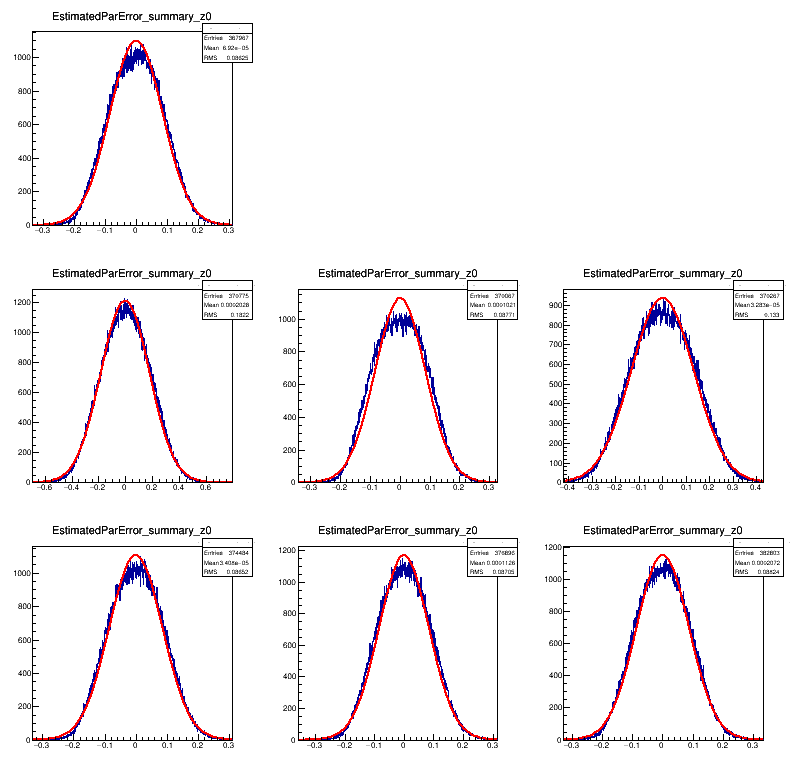

In [74]:
z0_histo = "EstimatedParError_summary_z0"
c, h, fitResults = fitAndDraw(base_z, f_name, z0_histo, layers_list)
c

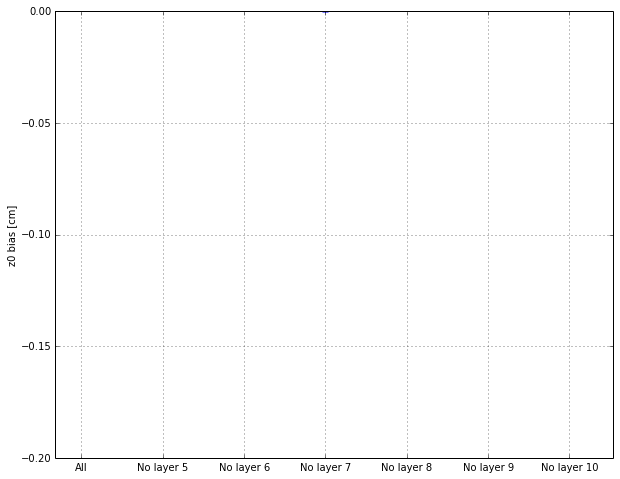

In [75]:
plt = plot(fitResults, 0, 'z0 bias [cm]', layers_list, y_min = -0.2)
plt.show()

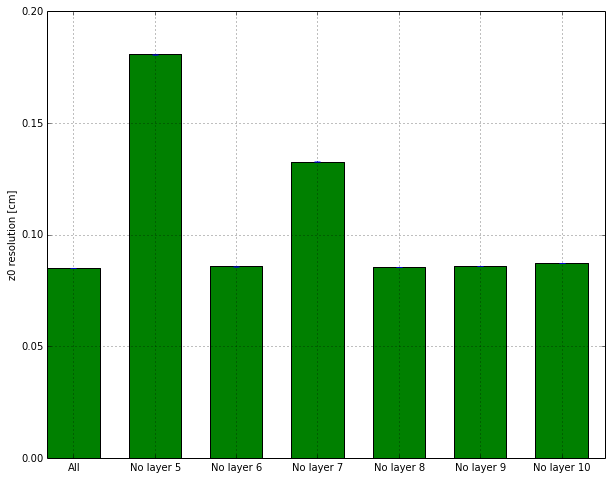

In [76]:
plt = plot(fitResults, 2, 'z0 resolution [cm]', layers_list, y_max = 0.2)
plt.show()

##CotTheta Bias and Resolution

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


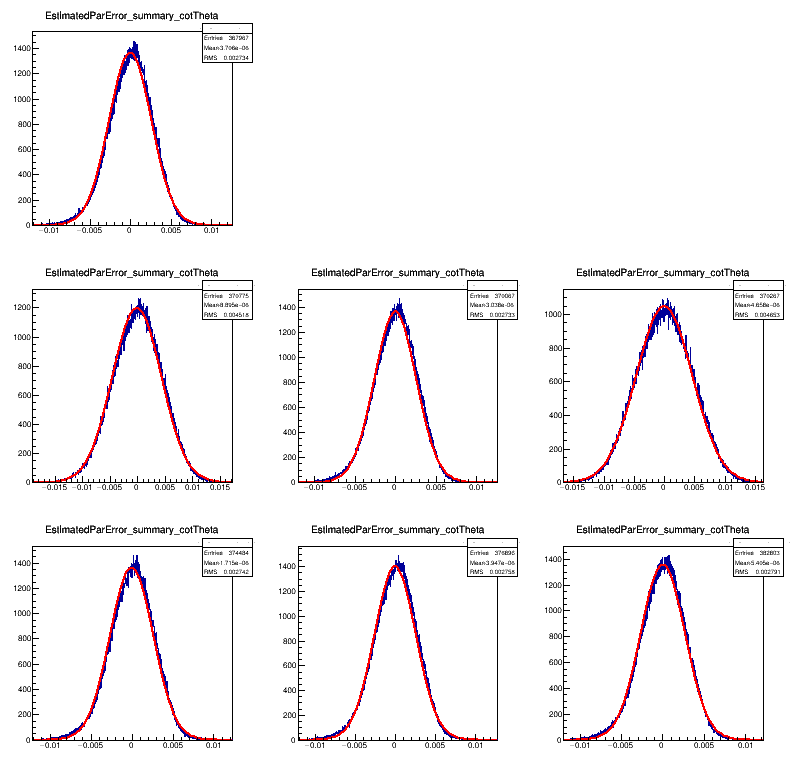

In [77]:
cotTheta_histo = "EstimatedParError_summary_cotTheta"
c, h, fitResults = fitAndDraw(base_z, f_name, cotTheta_histo, layers_list)
c

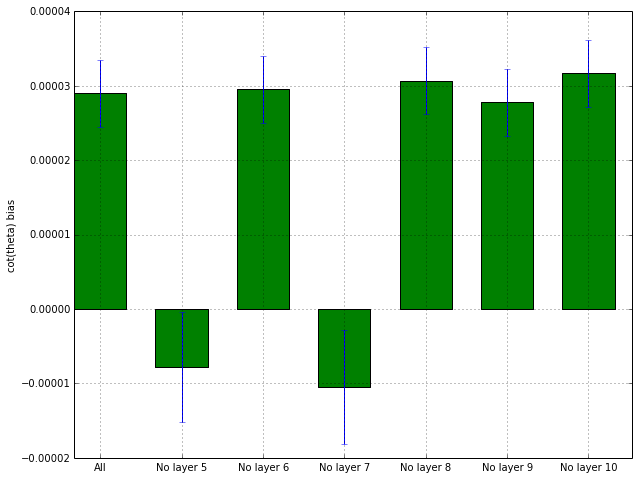

In [78]:
plt = plot(fitResults, 0, 'cot(theta) bias', layers_list)
plt.show()

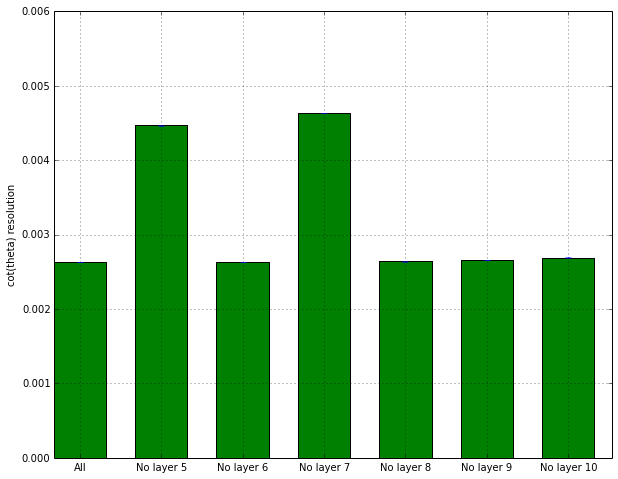

In [79]:
plt = plot(fitResults, 2, 'cot(theta) resolution', layers_list, y_max = 0.006)
plt.show()